In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
np.random.seed(123)

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


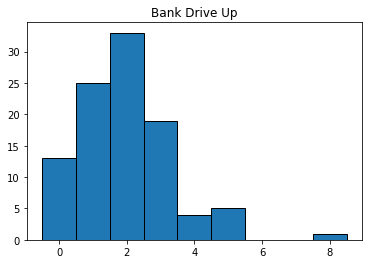

In [4]:
#rvs random values
driveup = stats.poisson(2)
n = 100
x = driveup.rvs(n)

plt.hist(x, bins=range(0,10), align='left', width=1, edgecolor = 'black')
plt.title("Bank Drive Up");


In [3]:
## Ravinders

q = 2

x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $q = 2$')
plt.xlabel('Number of cars')
plt.ylabel('P(X)');

NameError: name 'λ' is not defined

### 1.a)What is the probability that no cars drive up in the noon hour?


In [5]:
#specific value - discrete
driveup.pmf(0)

0.1353352832366127

In [6]:
stats.poisson(q).pmf(0)

0.1353352832366127

### 1b) What is the probability that 3 or more cars come through the drive through?


In [7]:
#greater than a continious point
#remember that it is greater than but not inclusive
driveup.sf(2)

0.32332358381693654

### 1c)How likely is it that the drive through gets at least 1 car?

In [8]:
# have the value want the probability 

driveup.sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:


In [9]:
n_simulations = 10_000
average_grade = 3 
standard_deviation = .3

In [10]:
#stats.norm = standard normal distribution
grades = stats.norm(3, .3)

#random values of simulation
grades
# grades = grades.rvs(n_simulations)
# grades

### 2a) What grade point average is required to be in the top 5% of the graduating class?


In [11]:
#I have probability and want the value = .isf

grades.isf(.05)

3.4934560880854417

### 2b) What GPA constitutes the bottom 15% of the class?


In [12]:
#we have the probability and want the value
grades.ppf(.15)

2.689069983151863

### 2c) If I have a GPA of 3.5, what percentile am I in?

In [13]:
#we have the value and want the probability

grades.cdf(3.5) #-thats not percentile need opposite

0.9522096477271853

In [14]:
grades.sf(3.5) #greater than given point

0.0477903522728147

In [15]:
#Ravinder's:
stats.norm(3, 0.3).isf(0.05)

3.4934560880854417

In [16]:
stats.norm(3,0.3).ppf(0.15)

2.689069983151863

In [17]:
stats.norm(3,0.3).ppf([0.2,0.3])

array([2.74751363, 2.84267985])

In [18]:
stats.norm(3,0.3).cdf(3.5)

0.9522096477271853

### 2c)An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [19]:
#3rd decile .2 - .3 
#have probability and want value
grades.ppf(.2)

2.7475136299281258

In [20]:
grades.ppf(.3)

2.842679846187588

In [21]:
#the student with 2.8 falls between 2.74 & 2.84

In [22]:
# If I have a GPA of 3.5, what percentile am I in?
stats.norm(3, 0.3).cdf(3.5)

0.9522096477271853

In [23]:

# by Simulation
(np.random.normal(3, 0.3, 100_000) < 3.5).mean()

0.95191

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [24]:
rate = .02
value = 97
n_simulations = 4326

#determine the probability of this happening - binom 
#we know the value and need probability
#(trials, success rate).(number of success)

In [25]:
stats.binom(4326,.02).sf(96)

0.1397582363130086

In [26]:
#using simulation - ravinders

clicks= np.random.choice([0,1], size=(10_000, 4326), p=(0.98,0.02))
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
(clicks.sum(axis=1) >= 97).mean()

0.1347

In [28]:
n = 4326
p= 0.02

stats.binom(n, p).sf(96)

0.1397582363130086

In [29]:
clicks = np.random.choice([0,1], size=(10_000, 4326), p=(0.98, 0.02))
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
(clicks.sum(axis=1) >= 97).mean()

0.1365

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [31]:
test2 = stats.binom(618, .1)
test2.sf(69)

0.15107528710211096

In [32]:
#100 questions , .01 chance, that at least 1 of your first 60 is right

test = stats.binom(60, .01)
test.sf(0)

0.4528433576092388

In [33]:
#ravinder's
n=60
p=0.01
stats.binom(n, p).sf(0)

0.4528433576092388

In [34]:
#by simulation:

((np.random.choice([0,1], size=(100_000, 60), p = (0.99,0.01))).sum(axis=1) >0).mean()

0.45459

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [35]:
#.3 chance 
#.9 visit (2nd condition)
#3*22

break_area = stats.binom((66*.9),0.03)
break_area.sf(0)

0.8342199288437355

In [36]:
clean_rate = break_area.sf(0)
clean_rate

0.8342199288437355

In [37]:
two_days = stats.binom(2,clean_rate).sf(0)
1 - two_days

0.027483031992576068

In [38]:
five_days = stats.binom(5,clean_rate).sf(0)
1 - five_days

0.00012521651388086585

In [39]:
#Ravinder's

In [40]:
# How likely is it that the break area gets cleaned up each day?

n = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n, p).sf(0)

0.8342199288437355

Text(0.5, 0, 'Number of time area is cleaned per day')

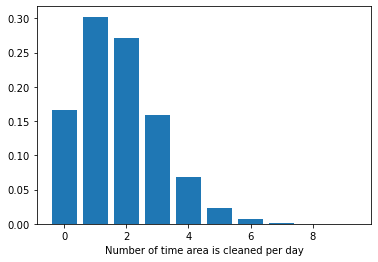

In [41]:
x = np.arange(0, 10)
y = stats.binom(n,p).pmf(x)

plt.bar(x, y)
plt.xlabel('Number of time area is cleaned per day')

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [44]:
#mean 15, std 3
#2 minutes an order and 10 minutes to get your food
mean_customers = 15
std = 3

order_time = 2
wait_time = 10
eat_time = 15
lunch_break = 60

In [45]:
60 - 15 - 10

#I have 35 minutes for the line!

35

In [46]:
wait_time = stats.norm(15,3)
wait_time

### I Have the value and want the probability
## my value is time greater than 35

In [47]:
#what is the max customers I can wait for
#so I only have 35 minutes and it takes 2 minutes a customer
35/2

17.5

In [48]:
wait_time.cdf(17)

0.7475074624530771

In [49]:
#if we include 2 min order time
wait_time.cdf(33/2)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?


In [53]:
from env import host, user, password

In [54]:
def get_db_url(user,password,host,database):
    return (f"mysql+pymysql://{user}:{password}@{host}/{database}")

In [55]:
url = get_db_url(user,password,host,database = "employees")


In [58]:
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries_df = pd.read_sql(query, url)

In [60]:
salaries_df.head(10)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
5,10006,59755,2001-08-02,9999-01-01
6,10007,88070,2002-02-07,9999-01-01
7,10009,94409,2002-02-14,9999-01-01
8,10010,80324,2001-11-23,9999-01-01
9,10012,54423,2001-12-16,9999-01-01


#### What percent of employees earn less than 60,000?

In [62]:
mean = salaries_df['salary'].mean()
std_dev = salaries_df['salary'].std()

In [64]:
stats.norm(mean,std_dev).cdf(60_000)

0.24385742480214423

#### What percent of employees earn more than 95,000?


In [65]:
stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

#### What percent of employees earn between 65,000 and 80,000?


In [67]:
np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.33506057])

#### - What do the top 5% of employees make?


In [68]:
stats.norm(mean, std_dev).isf(.05)

100484.64454102777